In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
% pylab inline

Populating the interactive namespace from numpy and matplotlib


* Download tables from HEASARC by using [browse_extract_wget.pl](https://heasarc.nasa.gov/FTP/heasarc/software/web_batch/browse_extract_wget.pl) version 2a

In [2]:
### Uncomment below for downloading: 
! wget -q -nc https://heasarc.nasa.gov/FTP/heasarc/software/web_batch/browse_extract_wget.pl \
    -O browse_extract_wget.pl

! perl ./browse_extract_wget.pl \
table=chanmaster \
position='0.,0.' \
radius=100000 \
coordinates=Galactic \
fields=All \
format=Text \
resultmax=100000 \
outfile=chandra-obs-raw.csv

In [3]:
# Final observation file size about 17 Mbytes (17k+ rows)
! wc chandra-obs-raw.csv

  17882  374533 5274063 chandra-obs-raw.csv


In [4]:
# It is written in txt format with '|' separator
! head -6 chandra-obs-raw.csv



Results from chanmaster
Coordinate system:galactic
|obsid|status     |name                                              |_l       |_b       |lii      |bii      |time               |detector|grating|exposure|type|pi                 |cycle|proposal|public_date|sequence_number|data_mode|category                                  |class|_offset   |
| 2284|archived   |GCS 14                                            |359.99998| -0.00002|359.99998| -0.00002|2001-07-18T14:24:44|ACIS-I  |NONE   |  10760.|GO  |Wang               |    2|02910585| 2001-07-25|         900111|TE_00490 |GALACTIC DIFFUSE EMISSION AND SURVEYS     | 3000|    0.0017|


In [5]:
# converting to pandas dataset
data = pd.read_csv('chandra-obs-raw.csv', sep='|', header=0, skiprows=4)
data.head()

,Unnamed: 0,obsid,status,name,_l,_b,lii,bii,time,detector,...,pi,cycle,proposal,public_date,sequence_number,data_mode,category,class,_offset,Unnamed: 22
0,NaN,2284,archived,GCS 14 ...,359.99998,-0.00002,359.99998,-0.00002,2001-07-18T14:24:44,ACIS-I,...,Wang,2,2910585,2001-07-25,900111,TE_00490,GALACTIC DIFFUSE EMISSION AND SURVEYS,3000,0.0017,NaN
1,NaN,12451,archived,Swift J174535.5-285921 ...,359.95142,-0.02240,359.95142,-0.02240,2011-07-21T06:34:24,ACIS-I,...,Chakrabarty,12,12400454,2012-07-22,401192,TE_00AC0,BH AND NS BINARIES,1000,3.2099,NaN
2,NaN,6191,archived,GC-2 ...,359.94823,-0.04357,359.94823,-0.04357,2005-10-20T18:18:58,HRC-I,...,Wijnands,6,6401083,2006-10-21,400451,DEFAULT,BH AND NS BINARIES,1000,4.0598,NaN
3,NaN,8532,archived,GC-2 ...,359.94823,-0.04357,359.94823,-0.04357,2007-07-24T11:32:07,HRC-I,...,Wijnands,9,9400003,2008-07-25,400683,DEFAULT,BH AND NS BINARIES,1000,4.0598,NaN
4,NaN,9073,archived,GC-2 ...,359.94823,-0.04357,359.94823,-0.04357,2008-05-10T23:41:23,HRC-I,...,Wijnands,9,9400397,2009-05-12,400924,DEFAULT,BH AND NS BINARIES,1000,4.0598,NaN


In [6]:
data.columns

Index(['Unnamed: 0', 'obsid', 'status     ',
       'name                                              ', '_l       ',
       '_b       ', 'lii      ', 'bii      ', 'time               ',
       'detector', 'grating', 'exposure', 'type', 'pi                 ',
       'cycle', 'proposal', 'public_date', 'sequence_number', 'data_mode',
       'category                                  ', 'class', '_offset   ',
       'Unnamed: 22'],
      dtype='object')

In [7]:
# Brief descrption of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17877 entries, 0 to 17876
Data columns (total 23 columns):
Unnamed: 0                                            0 non-null float64
obsid                                                 17877 non-null int64
status                                                17877 non-null object
name                                                  17877 non-null object
_l                                                    17877 non-null object
_b                                                    17877 non-null object
lii                                                   17877 non-null object
bii                                                   17877 non-null object
time                                                  17877 non-null object
detector                                              17877 non-null object
grating                                               17877 non-null object
exposure                                              17877

In [8]:
# shorted column names for simplicity
r = []
for col in data.columns:
    r.append(col.replace(' ', ''))
data.columns = r

In [9]:
data.columns

Index(['Unnamed:0', 'obsid', 'status', 'name', '_l', '_b', 'lii', 'bii',
       'time', 'detector', 'grating', 'exposure', 'type', 'pi', 'cycle',
       'proposal', 'public_date', 'sequence_number', 'data_mode', 'category',
       'class', '_offset', 'Unnamed:22'],
      dtype='object')

In [10]:
# Note that are several proposal categories already included to HEASARC data
data['category'].head(10)                                                             

0    GALACTIC DIFFUSE EMISSION AND SURVEYS     
1    BH AND NS BINARIES                        
2    BH AND NS BINARIES                        
3    BH AND NS BINARIES                        
4    BH AND NS BINARIES                        
5    BH AND NS BINARIES                        
6    BH AND NS BINARIES                        
7    ACTIVE GALAXIES AND QUASARS               
8    ACTIVE GALAXIES AND QUASARS               
9    ACTIVE GALAXIES AND QUASARS               
Name: category, dtype: object

In [11]:
# First and last columns do not contain any relevant information and are removed:
data.drop([data.columns[0], data.columns[-1]], axis=1, inplace=True)
data.head()

,obsid,status,name,_l,_b,lii,bii,time,detector,grating,...,type,pi,cycle,proposal,public_date,sequence_number,data_mode,category,class,_offset
0,2284,archived,GCS 14 ...,359.99998,-0.00002,359.99998,-0.00002,2001-07-18T14:24:44,ACIS-I,NONE,...,GO,Wang,2,2910585,2001-07-25,900111,TE_00490,GALACTIC DIFFUSE EMISSION AND SURVEYS,3000,0.0017
1,12451,archived,Swift J174535.5-285921 ...,359.95142,-0.02240,359.95142,-0.02240,2011-07-21T06:34:24,ACIS-I,NONE,...,TOO,Chakrabarty,12,12400454,2012-07-22,401192,TE_00AC0,BH AND NS BINARIES,1000,3.2099
2,6191,archived,GC-2 ...,359.94823,-0.04357,359.94823,-0.04357,2005-10-20T18:18:58,HRC-I,NONE,...,GO,Wijnands,6,6401083,2006-10-21,400451,DEFAULT,BH AND NS BINARIES,1000,4.0598
3,8532,archived,GC-2 ...,359.94823,-0.04357,359.94823,-0.04357,2007-07-24T11:32:07,HRC-I,NONE,...,GO,Wijnands,9,9400003,2008-07-25,400683,DEFAULT,BH AND NS BINARIES,1000,4.0598
4,9073,archived,GC-2 ...,359.94823,-0.04357,359.94823,-0.04357,2008-05-10T23:41:23,HRC-I,NONE,...,GO,Wijnands,9,9400397,2009-05-12,400924,DEFAULT,BH AND NS BINARIES,1000,4.0598


In [12]:
data['status'].unique()

array(['archived   ', 'scheduled  ', 'observed   ', 'unobserved ',
       'untriggered'], dtype=object)

In [13]:
data['detector'].unique()

array(['ACIS-I  ', 'HRC-I   ', 'ACIS-S  ', 'HRC-S   '], dtype=object)

In [14]:
data['category'].unique()

array(['GALACTIC DIFFUSE EMISSION AND SURVEYS     ',
       'BH AND NS BINARIES                        ',
       'ACTIVE GALAXIES AND QUASARS               ',
       'NORMAL GALAXIES                           ',
       'SN, SNR AND ISOLATED NS                   ',
       'WD BINARIES AND CV                        ',
       'STARS AND WD                              ',
       'SOLAR SYSTEM                              ',
       'CLUSTERS OF GALAXIES                      ',
       'EXTRAGALACTIC DIFFUSE EMISSION AND SURVEYS'], dtype=object)

In [15]:
data['category'] = data['category'].apply(lambda x: str(x).rstrip())
categories = data['category'].unique().tolist()
data['category_num'] = data['category'].apply(lambda x: categories.index(x))
data['category_num'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
print(categories)

['GALACTIC DIFFUSE EMISSION AND SURVEYS', 'BH AND NS BINARIES', 'ACTIVE GALAXIES AND QUASARS', 'NORMAL GALAXIES', 'SN, SNR AND ISOLATED NS', 'WD BINARIES AND CV', 'STARS AND WD', 'SOLAR SYSTEM', 'CLUSTERS OF GALAXIES', 'EXTRAGALACTIC DIFFUSE EMISSION AND SURVEYS']


In [17]:
# We select archived observations observed with either ACIS-I or ACIS-S
#data = data[data['data_in_heasarc'] == data['data_in_heasarc'].unique()[0]]
data = data[((data['detector'] == 'ACIS-I  ') | (data['detector'] == 'ACIS-S  ')) & (data['status'] == 'archived   ')]
data.head()

,obsid,status,name,_l,_b,lii,bii,time,detector,grating,...,pi,cycle,proposal,public_date,sequence_number,data_mode,category,class,_offset,category_num
0,2284,archived,GCS 14 ...,359.99998,-0.00002,359.99998,-0.00002,2001-07-18T14:24:44,ACIS-I,NONE,...,Wang,2,2910585,2001-07-25,900111,TE_00490,GALACTIC DIFFUSE EMISSION AND SURVEYS,3000,0.0017,0
1,12451,archived,Swift J174535.5-285921 ...,359.95142,-0.02240,359.95142,-0.02240,2011-07-21T06:34:24,ACIS-I,NONE,...,Chakrabarty,12,12400454,2012-07-22,401192,TE_00AC0,BH AND NS BINARIES,1000,3.2099,1
7,15042,archived,Sgr A ...,359.94422,-0.04601,359.94422,-0.04601,2013-08-11T22:56:52,ACIS-S,NONE,...,Haggard,14,14700824,2013-09-13,702849,TE_00B98,ACTIVE GALAXIES AND QUASARS,7000,4.3382,2
8,16508,archived,Sgr A ...,359.94422,-0.04601,359.94422,-0.04601,2014-02-21T11:36:41,ACIS-S,NONE,...,Haggard,14,14700824,2014-03-23,703024,TE_008FC,ACTIVE GALAXIES AND QUASARS,7000,4.3382,2
9,15043,archived,Sgr A ...,359.94422,-0.04601,359.94422,-0.04601,2013-09-14T00:03:46,ACIS-S,NONE,...,Haggard,14,14700824,2013-10-15,702850,TE_008FC,ACTIVE GALAXIES AND QUASARS,7000,4.3382,2


In [18]:
data['exposure'].head()

0    10760.0
1     1050.0
7    49420.0
8    47870.0
9    50070.0
Name: exposure, dtype: float64

In [19]:
for col in ['exposure', '_offset', 'category_num', '_l', '_b']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [20]:
data.describe()

,obsid,_l,_b,exposure,cycle,proposal,sequence_number,class,_offset,category_num
count,13915.000000,13915.000000,13915.000000,13915.000000,13915.000000,1.391500e+04,13915.000000,13915.000000,13915.000000,13915.000000
mean,9775.849012,183.010037,8.927397,25548.526770,9.192885,9.800713e+06,608705.298311,5209.002012,5022.713154,4.284226
std,5807.411630,109.026836,42.656498,27575.348586,5.014083,5.020572e+06,213648.195488,2571.520009,2474.092212,2.739818
min,1.000000,0.000010,-89.376780,60.000000,0.000000,2.000450e+05,100000.000000,1000.000000,0.001700,0.000000
25%,4827.500000,86.364310,-22.533110,6090.000000,5.000000,5.508192e+06,500275.500000,3200.000000,3622.961200,2.000000
50%,9698.000000,179.832000,1.020030,16040.000000,9.000000,9.800349e+06,700382.000000,5000.000000,5129.194900,4.000000
75%,14435.500000,283.770990,45.888680,34955.000000,13.000000,1.380088e+07,800230.500000,7000.000000,6853.450300,7.000000
max,62877.000000,359.999990,89.583710,192360.000000,19.000000,1.990067e+07,980458.000000,9999.000000,10764.413500,9.000000


In [21]:
filtered_data = data[['obsid', 'exposure', '_offset', '_l', '_b', 'category_num']]
filtered_data = filtered_data.dropna(axis=0, how='any')
filtered_data.head()

,obsid,exposure,_offset,_l,_b,category_num
0,2284,10760.0,0.0017,359.99998,-0.00002,0
1,12451,1050.0,3.2099,359.95142,-0.02240,1
7,15042,49420.0,4.3382,359.94422,-0.04601,2
8,16508,47870.0,4.3382,359.94422,-0.04601,2
9,15043,50070.0,4.3382,359.94422,-0.04601,2


In [22]:
# group exposure by off-center angle _offset by making $10^\circ$ bins
dr = 10
filtered_data['raw_offset'] = filtered_data['_offset'].apply(lambda x: math.floor(x/(60.0*dr))*dr)
filtered_data.head()

binned_time = filtered_data.groupby('raw_offset').agg(sum)[['exposure']]

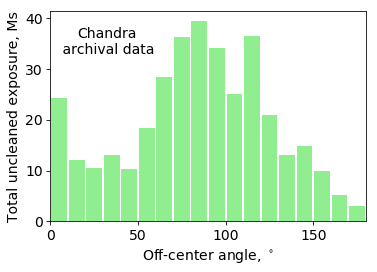

In [23]:
plt.xlim([0., 180.])
plt.bar(np.array(binned_time.index + 5), 1e-6*np.array(binned_time['exposure']), 
        width=9.0, color='lightgreen')
plt.xlabel('Off-center angle, ${}^\circ$', size=14)
plt.ylabel('Total uncleaned exposure, Ms', size=14)
plt.tick_params(axis ='both', which='major', length=4, labelsize =14, color='black')
plt.tick_params(axis ='both', which='minor', length=0)
plt.figtext(x=0.28, y=0.73, s='Chandra\n archival data', 
            ha='center', size=14, color='black')
plt.subplots_adjust(left=0.15, right=0.88, top=0.88, bottom=0.15)

plt.savefig("chandra-uncleaned-exposure.pdf", format="pdf", 
            transparent=True,rasterized=True,dpi=300, pad_inches=1)

Selecting only requested columns (pointing ID, exposures, coords, category -- cluster, galaxy etc)

In [24]:
filtered_data.head()

,obsid,exposure,_offset,_l,_b,category_num,raw_offset
0,2284,10760.0,0.0017,359.99998,-0.00002,0,0
1,12451,1050.0,3.2099,359.95142,-0.02240,1,0
7,15042,49420.0,4.3382,359.94422,-0.04601,2,0
8,16508,47870.0,4.3382,359.94422,-0.04601,2,0
9,15043,50070.0,4.3382,359.94422,-0.04601,2,0


In [25]:
filtered_data.groupby('category_num').agg(sum)[['exposure']]*1e-6

,exposure
category_num,
0,8.48603
1,28.29716
2,70.76828
3,37.87637
4,53.55605
5,8.47030
6,45.00360
7,2.10535
8,70.11851


In [26]:
filtered_data.to_csv('filtered_data_chandra.csv')
! wc filtered_data_chandra.csv

 13916  13916 789286 filtered_data_chandra.csv
